<a href="https://colab.research.google.com/github/kavita200496/Computer-Vision/blob/master/creating_panorama_of_two_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_ = cv2.imread('/content/sample_data/left.jpg')
img_ = cv2.resize(img_, (0,0), fx=1, fy=1)
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img = cv2.imread('/content/sample_data/right.jpg')
img = cv2.resize(img, (0,0), fx=1, fy=1)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

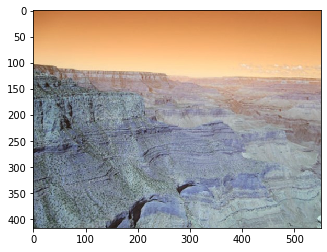

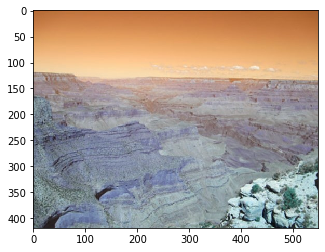

In [ ]:
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

In [ ]:
kp1, des1 = orb.detectAndCompute(img1, None)

In [ ]:
kp2, des2 = orb.detectAndCompute(img2, None)

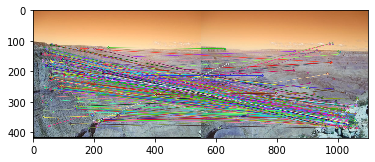

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches, None)
plt.imshow(matching_result)
plt.show()

In [ ]:
bf = cv2.BFMatcher()

In [ ]:
matches = bf.knnMatch(des1, des2, k=2)

In [ ]:
good = []
for m,n in matches:
  if m.distance < 0.75*n.distance:
    good.append(n) 

In [ ]:
draw_params = dict(matchColor=(0,255,0), singlePointColor=None, flags=2)

In [ ]:
img3 = cv2.drawMatches(img_, kp1, img, kp2, good, None, **draw_params)

In [ ]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
  src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
  dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

  M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
  #print (M)
  #h, w = img1.shape
  #pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
  #dst = cv2.perspectiveTransform(pts, M)
  #img2 = cv2.polylines(img2, [np.int32(dst)], True, 255,3, cv2.LINE_AA)
  #plt.imshow(img2)
  #plt.show()
#else:
 # print("Not")

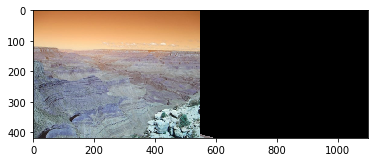

In [ ]:
dst = cv2.warpPerspective(img_,M,(img.shape[1] + img_.shape[1], img.shape[0]))
dst[0:img.shape[0], 0:img.shape[1]] = img
plt.imshow(dst)
plt.show()

In [ ]:
def trim(frame):
    if not np.sum(frame[0]):
        return trim(frame[1:])
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame
    

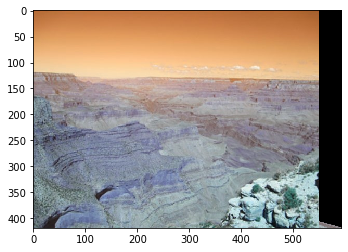

In [ ]:
plt.imshow(trim(dst))